# Pretrained Models Evaluation

----
### Import Libraries

In [8]:
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b4,efficientnet_b2,efficientnet_b0
from xcit.xcit import XCiT,xcit_nano,xcit_tiny12
from T.Train_evaluate_pretrained import *
from sklearn.metrics import classification_report

----
### Data Reading and Processing

As number of classes in the trained models are different that we have now, we should have a new mapping fot two reasons; first, to match classes indicies and to have a class called other, will be used when a predicted class does not exist in our dataset and secondly, to match the classes indicies in our dataset with the numbering in the pretrained models

In [2]:
selected_classes = [
    "bpsk", "qpsk", "8psk", "16qam", "64qam", "256qam", "ofdm-64", "ofdm-72", "ofdm-128",
    "ofdm-180", "ofdm-256", "ofdm-300", "ofdm-512", "ofdm-600", "ofdm-900", "ofdm-1024", "ofdm-1200", "ofdm-2048","other"
]

default_classes = [
    "ook", "bpsk", "4pam", "4ask", "qpsk", "8pam", "8ask", "8psk", "16qam", "16pam",
    "16ask", "16psk", "32qam", "32qam_cross", "32pam", "32ask", "32psk", "64qam", "64pam",
    "64ask", "64psk", "128qam_cross", "256qam", "512qam_cross", "1024qam", "2fsk", "2gfsk",
    "2msk", "2gmsk", "4fsk", "4gfsk", "4msk", "4gmsk", "8fsk", "8gfsk", "8msk", "8gmsk",
    "16fsk", "16gfsk", "16msk", "16gmsk", "ofdm-64", "ofdm-72", "ofdm-128", "ofdm-180",
    "ofdm-256", "ofdm-300", "ofdm-512", "ofdm-600", "ofdm-900", "ofdm-1024", "ofdm-1200", "ofdm-2048","other"
]

In [3]:

indices = []

for cls in selected_classes:
    index = default_classes.index(cls)
    indices.append(index)

print(indices)

[1, 4, 7, 8, 17, 22, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [4]:

# Specify Sig53 Options
#root = "../../../../data/torchsig/sig18a"
root = "../../../../data/torchsig/sig18-small"

train = False
impaired = True

transform = ST.Compose([
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])

target_transform = ST.DescToClassIndex(class_list=selected_classes)

sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_val))
data, label = sig53_clean_val[idx]
print("Dataset length: {}".format(len(sig53_clean_val)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))


Dataset length: 36000
Data shape: (2, 4096)
Label Index: 6
Label Class: ofdm-64


In [5]:
sig53 = Sig53(
    root=root,
    train=False,
    impaired=impaired,
    transform=None,
    target_transform=None,


)

# Retrieve a sample and print out information
idx = np.random.randint(len(sig53))
data, (label, snr) = sig53[idx]
print("Dataset length: {}".format(len(sig53)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))
print("SNR: {}".format(snr))

Dataset length: 36000
Data shape: (4096,)
Label Index: 14
Label Class: ofdm-900
SNR: 26.47340632966321


In [6]:

val_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=128,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

In [7]:
meta_dataloader = DataLoader(
    dataset=sig53,
    batch_size=128,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

----
## Evaluation


### EfficientNet

B4

In [8]:
model = efficientnet_b4(
    pretrained=True,
    path="efficientnet_b4.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Validation Loss: 15.4266
Validation Accuracy: 70.54%
Average Inference Time per Batch: 0.2796 seconds


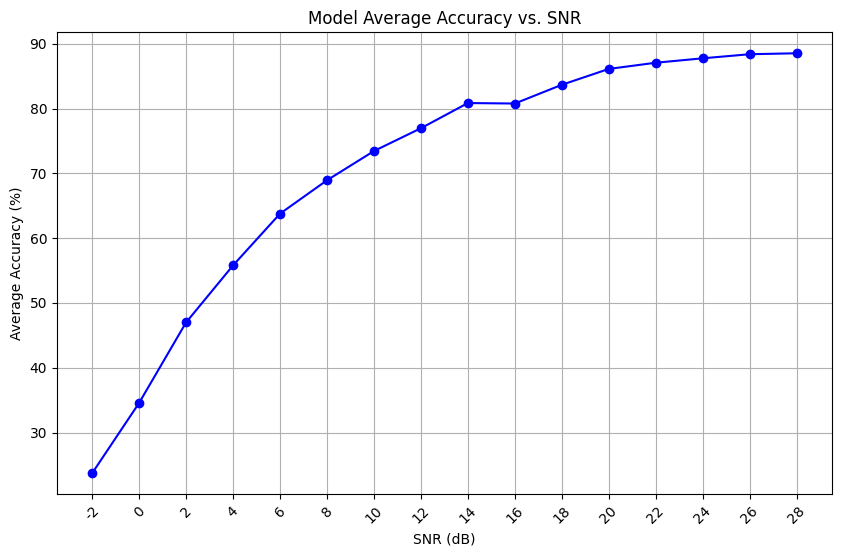

accuracy when SNR = 2.5 (+- 0.5): 46.99%
accuracy when SNR =  10 (+- 0.5): 73.44%
accuracy when SNR = 20 (+- 0.5): 86.11%
Average accuracy between SNR 2 and 20: 70.01%


<Figure size 2000x2000 with 0 Axes>

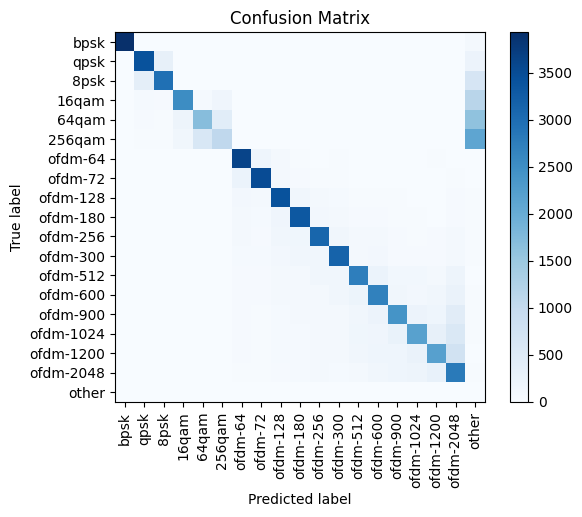

In [9]:
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')
results = evaluate_model(model, val_dataloader,meta_dataloader, criterion,device,indices)
labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [15]:
eff4 = results['average_accuracies']

In [17]:
print(classification_report(labels, predictions, target_names=selected_classes))

              precision    recall  f1-score   support

        bpsk       1.00      0.98      0.99      3998
        qpsk       0.87      0.86      0.86      3996
        8psk       0.88      0.74      0.80      3998
       16qam       0.88      0.63      0.73      3997
       64qam       0.71      0.42      0.53      3994
      256qam       0.62      0.26      0.37      3994
     ofdm-64       0.82      0.90      0.86      3998
     ofdm-72       0.85      0.88      0.86      3995
    ofdm-128       0.79      0.86      0.82      3995
    ofdm-180       0.79      0.83      0.81      3996
    ofdm-256       0.79      0.78      0.78      3996
    ofdm-300       0.79      0.79      0.79      3996
    ofdm-512       0.74      0.69      0.71      3994
    ofdm-600       0.69      0.67      0.68      3996
    ofdm-900       0.71      0.61      0.65      3999
   ofdm-1024       0.68      0.55      0.61      3997
   ofdm-1200       0.66      0.55      0.60      3999
   ofdm-2048       0.53    

/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

B2

In [18]:
model = efficientnet_b2(
    pretrained=True,
    path="efficientnet_b2.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Validation Loss: 15.2567
Validation Accuracy: 63.06%
Average Inference Time per Batch: 0.1528 seconds


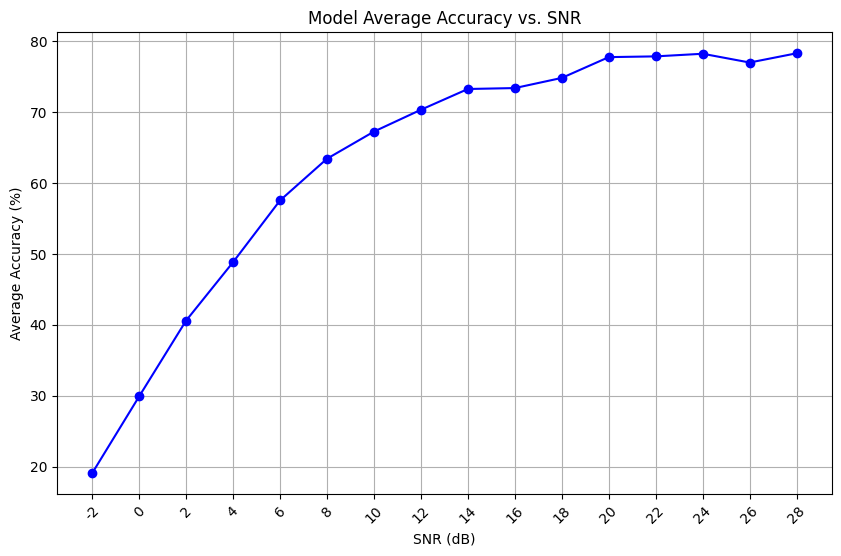

accuracy when SNR = 2.5 (+- 0.5): 40.60%
accuracy when SNR =  10 (+- 0.5): 67.27%
accuracy when SNR = 20 (+- 0.5): 77.77%
Average accuracy between SNR 2 and 20: 63.18%


<Figure size 2000x2000 with 0 Axes>

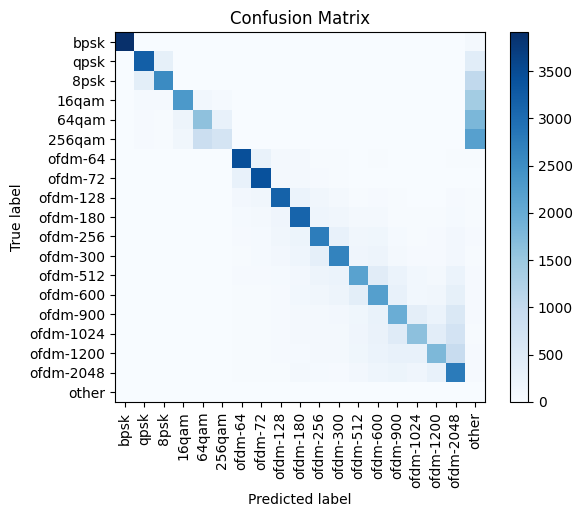

In [19]:
results = evaluate_model(model, val_dataloader,meta_dataloader, criterion,device,indices)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [20]:
eff2 = results['average_accuracies']

In [21]:
print(classification_report(labels, predictions, target_names=selected_classes))

              precision    recall  f1-score   support

        bpsk       0.99      0.98      0.99      3998
        qpsk       0.86      0.80      0.83      3996
        8psk       0.85      0.64      0.73      3998
       16qam       0.86      0.58      0.69      3997
       64qam       0.61      0.40      0.49      3994
      256qam       0.65      0.17      0.27      3994
     ofdm-64       0.84      0.86      0.85      3998
     ofdm-72       0.82      0.86      0.84      3995
    ofdm-128       0.79      0.79      0.79      3995
    ofdm-180       0.71      0.78      0.74      3996
    ofdm-256       0.67      0.69      0.68      3996
    ofdm-300       0.68      0.66      0.67      3996
    ofdm-512       0.62      0.54      0.58      3994
    ofdm-600       0.54      0.55      0.55      3996
    ofdm-900       0.54      0.49      0.51      3999
   ofdm-1024       0.59      0.41      0.48      3997
   ofdm-1200       0.58      0.45      0.51      3999
   ofdm-2048       0.47    

/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

B0

In [22]:
model = efficientnet_b0(
    pretrained=True,
    path="efficientnet_b0.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Validation Loss: 15.2257
Validation Accuracy: 57.38%
Average Inference Time per Batch: 0.1005 seconds


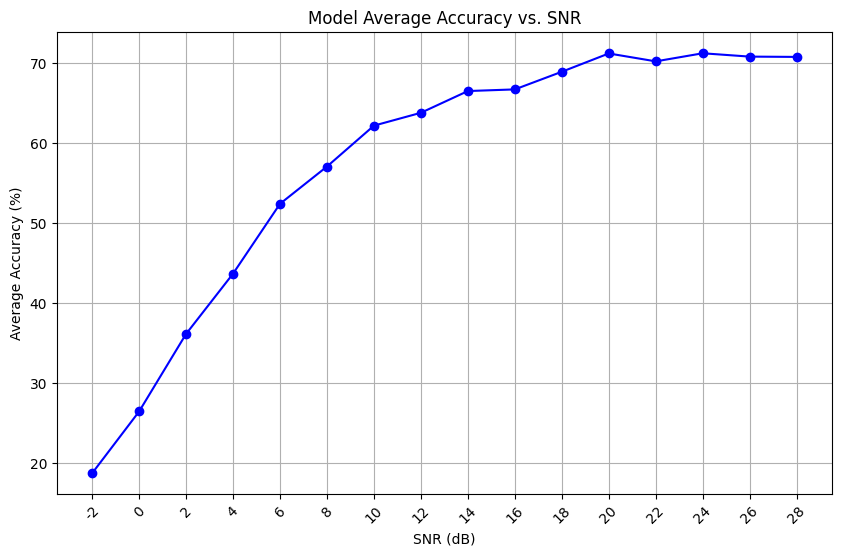

accuracy when SNR = 2.5 (+- 0.5): 36.14%
accuracy when SNR =  10 (+- 0.5): 62.19%
accuracy when SNR = 20 (+- 0.5): 71.22%
Average accuracy between SNR 2 and 20: 57.40%


<Figure size 2000x2000 with 0 Axes>

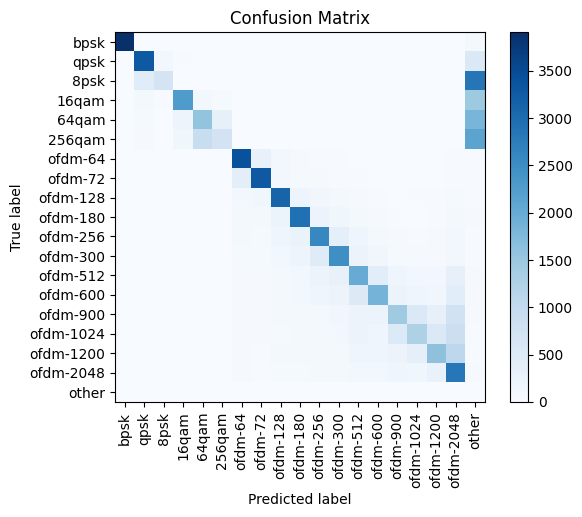

In [23]:
results = evaluate_model(model, val_dataloader,meta_dataloader, criterion,device,indices)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [24]:
eff0 = results['average_accuracies']


In [25]:
print(classification_report(labels, predictions, target_names=selected_classes))

              precision    recall  f1-score   support

        bpsk       0.99      0.98      0.99      3998
        qpsk       0.84      0.82      0.83      3996
        8psk       0.83      0.17      0.28      3998
       16qam       0.85      0.57      0.68      3997
       64qam       0.59      0.39      0.47      3994
      256qam       0.62      0.18      0.27      3994
     ofdm-64       0.78      0.85      0.82      3998
     ofdm-72       0.79      0.82      0.81      3995
    ofdm-128       0.73      0.78      0.75      3995
    ofdm-180       0.71      0.74      0.72      3996
    ofdm-256       0.62      0.65      0.64      3996
    ofdm-300       0.62      0.62      0.62      3996
    ofdm-512       0.53      0.50      0.52      3994
    ofdm-600       0.57      0.46      0.51      3996
    ofdm-900       0.50      0.36      0.42      3999
   ofdm-1024       0.47      0.31      0.38      3997
   ofdm-1200       0.51      0.40      0.45      3999
   ofdm-2048       0.43    

/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

### XCiT

Nano

In [26]:
model = xcit_nano(
    pretrained=True,
    path="xcit_nano.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Validation Loss: 11.2156
Validation Accuracy: 59.69%
Average Inference Time per Batch: 0.5346 seconds


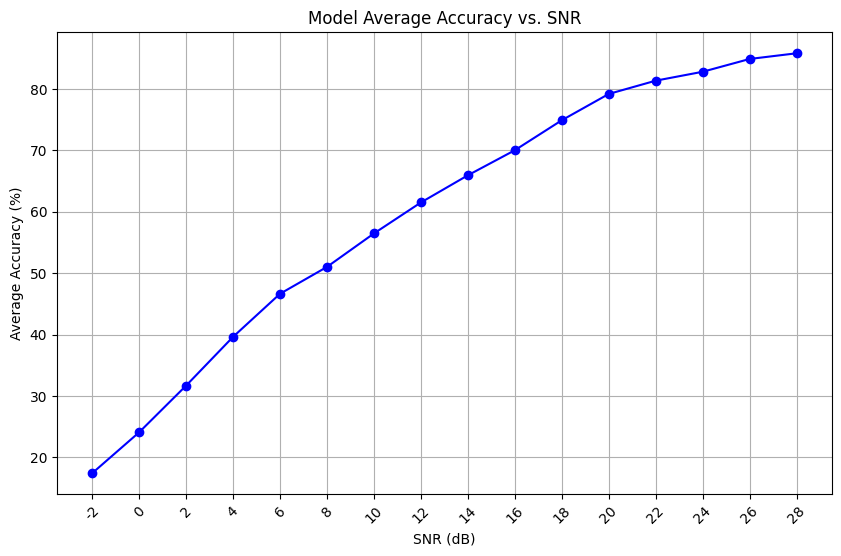

accuracy when SNR = 2.5 (+- 0.5): 31.68%
accuracy when SNR =  10 (+- 0.5): 56.48%
accuracy when SNR = 20 (+- 0.5): 79.22%
Average accuracy between SNR 2 and 20: 55.18%


<Figure size 2000x2000 with 0 Axes>

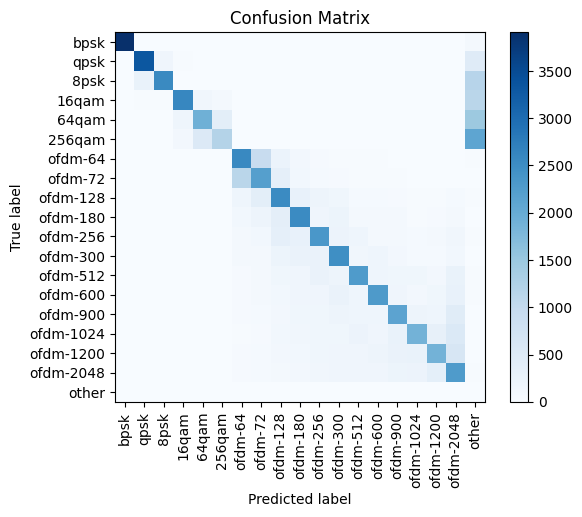

In [27]:
results = evaluate_model(model, val_dataloader,meta_dataloader, criterion,device,indices)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [28]:
nano = results['average_accuracies']

In [29]:
print(classification_report(labels, predictions, target_names=selected_classes))

              precision    recall  f1-score   support

        bpsk       1.00      0.98      0.99      3998
        qpsk       0.91      0.83      0.87      3996
        8psk       0.92      0.64      0.76      3998
       16qam       0.89      0.65      0.75      3997
       64qam       0.73      0.48      0.58      3994
      256qam       0.70      0.30      0.42      3994
     ofdm-64       0.59      0.64      0.61      3998
     ofdm-72       0.52      0.55      0.54      3995
    ofdm-128       0.54      0.64      0.58      3995
    ofdm-180       0.58      0.64      0.61      3996
    ofdm-256       0.58      0.59      0.59      3996
    ofdm-300       0.59      0.62      0.60      3996
    ofdm-512       0.62      0.57      0.60      3994
    ofdm-600       0.64      0.57      0.61      3996
    ofdm-900       0.62      0.53      0.57      3999
   ofdm-1024       0.63      0.47      0.54      3997
   ofdm-1200       0.59      0.47      0.52      3999
   ofdm-2048       0.47    

/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Tiny12

In [9]:
model = xcit_tiny12(
    pretrained=True,
    path="xcit_tiny12.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Validation Loss: 11.8018
Validation Accuracy: 65.86%
Average Inference Time per Batch: 0.9113 seconds


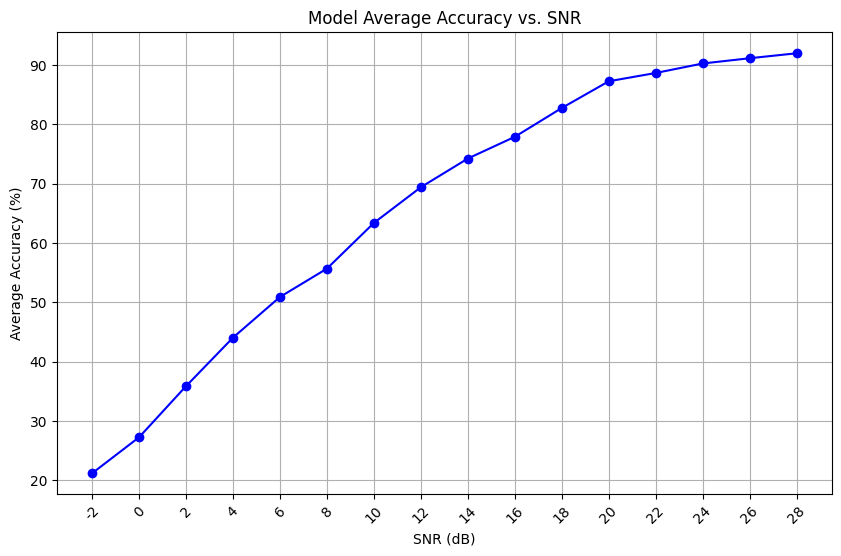

accuracy when SNR = 2.5 (+- 0.5): 35.87%
accuracy when SNR =  10 (+- 0.5): 63.40%
accuracy when SNR = 20 (+- 0.5): 87.28%
Average accuracy between SNR 2 and 20: 61.43%


<Figure size 2000x2000 with 0 Axes>

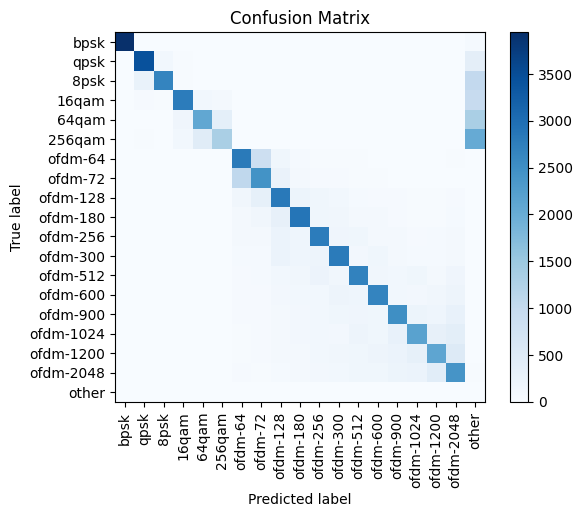

In [31]:
results = evaluate_model(model, val_dataloader,meta_dataloader, criterion,device,indices)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [32]:
tiny = results['average_accuracies']

In [33]:
print(classification_report(labels, predictions, target_names=selected_classes))

              precision    recall  f1-score   support

        bpsk       1.00      0.99      0.99      3998
        qpsk       0.91      0.86      0.89      3996
        8psk       0.94      0.67      0.78      3998
       16qam       0.89      0.70      0.78      3997
       64qam       0.78      0.52      0.63      3994
      256qam       0.73      0.33      0.46      3994
     ofdm-64       0.64      0.70      0.67      3998
     ofdm-72       0.59      0.61      0.60      3995
    ofdm-128       0.63      0.71      0.67      3995
    ofdm-180       0.69      0.72      0.70      3996
    ofdm-256       0.68      0.70      0.69      3996
    ofdm-300       0.69      0.70      0.69      3996
    ofdm-512       0.68      0.67      0.68      3994
    ofdm-600       0.70      0.66      0.68      3996
    ofdm-900       0.67      0.62      0.65      3999
   ofdm-1024       0.65      0.54      0.59      3997
   ofdm-1200       0.62      0.53      0.57      3999
   ofdm-2048       0.57    

/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [35]:
for x in [eff4,eff2,eff0,nano,tiny]:
 print(x)

[23.711111111111112, 34.563602599814296, 46.99033391915641, 55.78806767586821, 63.77284595300261, 68.92857142857143, 73.4402460456942, 76.9620811287478, 80.84808946877912, 80.77433628318585, 83.66788321167883, 86.11365719523373, 87.0704467353952, 87.7546689303905, 88.38339222614842, 88.5304659498208]
[19.066666666666666, 29.89786443825441, 40.597539543058, 48.842386464826355, 57.550043516100956, 63.4375, 67.2671353251318, 70.34832451499118, 73.27586206896552, 73.40707964601769, 74.84032846715328, 77.77268560953254, 77.87800687285224, 78.24702886247877, 77.00971731448763, 78.31541218637993]
[18.711111111111112, 26.439182915506034, 36.13796133567663, 43.67764915405165, 52.41514360313316, 57.075892857142854, 62.19244288224956, 63.80070546737213, 66.51910531220877, 66.72566371681415, 68.93248175182482, 71.21906507791017, 70.23195876288659, 71.24363327674024, 70.82597173144876, 70.78853046594982]
[17.4, 24.071494893221914, 31.678383128295255, 39.6260017809439, 46.64926022628372, 51.02678571